# Credit Card Default Risk - Prediction

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# import warings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [7]:
test_data = pd.read_csv('test.csv')
test_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


### Inspect data and treat data

In [6]:
# check shape and length
print(train_data.shape)
print(len(train_data))

(45528, 19)
45528


In [8]:
print(test_data.shape)
print(len(test_data))

(11383, 18)
11383


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [37]:
# check for null values
train_data.isna().mean()*100

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.201458
owns_house                 0.000000
no_of_children             1.700053
net_yearly_income          0.000000
no_of_days_employed        1.016957
occupation_type            0.000000
total_family_members       0.182305
migrant_worker             0.191091
yearly_debt_payments       0.208663
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.017572
prev_defaults              0.000000
default_in_last_6months    0.000000
credit_card_default        0.000000
dtype: float64

In [5]:
train_data.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [38]:
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [33]:
# get all categorical features
cols = train_data.columns 

for i in cols:
    if len(train_data[i].value_counts())<=20:
        print("Column Name:",i)
        print(train_data[i].value_counts())
        print("*"*50)

Column Name: gender
F      29957
M      15570
XNA        1
Name: gender, dtype: int64
**************************************************
Column Name: owns_car
N    29743
Y    15238
Name: owns_car, dtype: int64
**************************************************
Column Name: owns_house
Y    31642
N    13886
Name: owns_house, dtype: int64
**************************************************
Column Name: no_of_children
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
8.0        1
7.0        1
9.0        1
Name: no_of_children, dtype: int64
**************************************************
Column Name: occupation_type
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              9

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
<br>
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

In [79]:
train_data.isna().sum().sort_values(ascending=False).head(10)

no_of_children             774
owns_car                   547
no_of_days_employed        463
yearly_debt_payments        95
migrant_worker              87
total_family_members        83
credit_score                 8
customer_id                  0
default_in_last_6months      0
prev_defaults                0
dtype: int64

In [68]:
train_data[train_data['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [92]:
# change it to M as the name pronunces as Male
train_data['gender'] = train_data['gender'].apply(lambda x: 'M' if x=='XNA' else x)
train_data['gender'].value_counts()

F    29957
M    15571
Name: gender, dtype: int64

In [97]:
# fill no_of_children with mode of the data
train_data['no_of_children'].fillna(train_data['no_of_children'].mode()[0], inplace=True)

In [98]:
# fill owns_car with mode of the data
train_data['owns_car'].fillna(train_data['owns_car'].mode()[0], inplace=True)

In [108]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = train_data.groupby(by='occupation_type')['no_of_days_employed'].median()
occp_days_employed

occupation_type
Accountants                1822.0
Cleaning staff             1509.0
Cooking staff              1429.5
Core staff                 1883.0
Drivers                    1342.0
HR staff                   1528.0
High skill tech staff      1728.0
IT staff                   1747.0
Laborers                   1687.0
Low-skill Laborers          983.0
Managers                   2118.0
Medicine staff             2826.0
Private service staff      1718.0
Realty agents              1390.0
Sales staff                1276.0
Secretaries                2001.5
Security staff             1419.0
Unknown                  365241.0
Waiters/barmen staff       1258.0
Name: no_of_days_employed, dtype: float64

In [107]:
occp_days_employed['Accountants']

1822.0

In [112]:
train_data[train_data['no_of_days_employed'] == np.NaN]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default


In [ ]:
def impute(x, table=occp_days_employed):
    if x == np.NaN

In [121]:
for i in occp_days_employed.index:
    train_data[(train_data['occupation_type'] == i) & (train_data['no_of_days_employed'].isna())]['no_of_days_employed'] = occp_days_employed[i]

In [124]:
train_data['no_of_days_employed'].isna().sum()

463

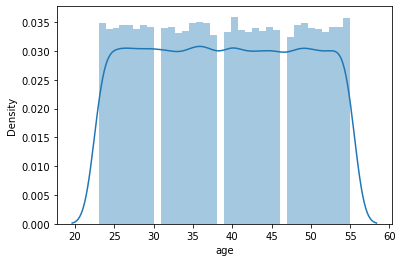

In [20]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(train_data['age'])
plt.show()

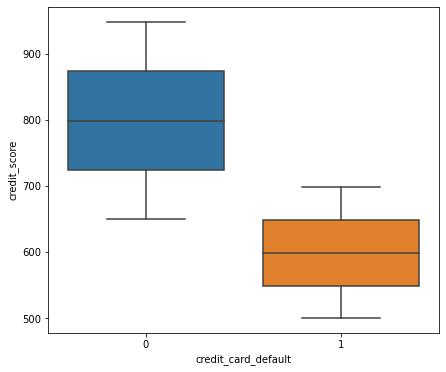

In [41]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(train_data['credit_card_default'], train_data['credit_score'])
plt.show()

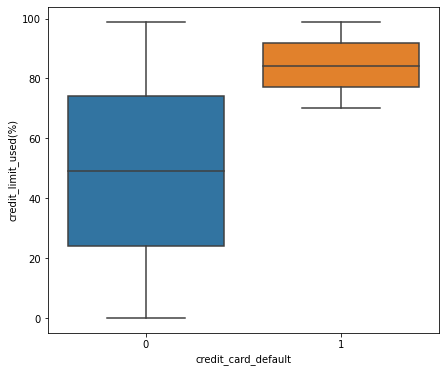

In [42]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(train_data['credit_card_default'], train_data['credit_limit_used(%)'])
plt.show()

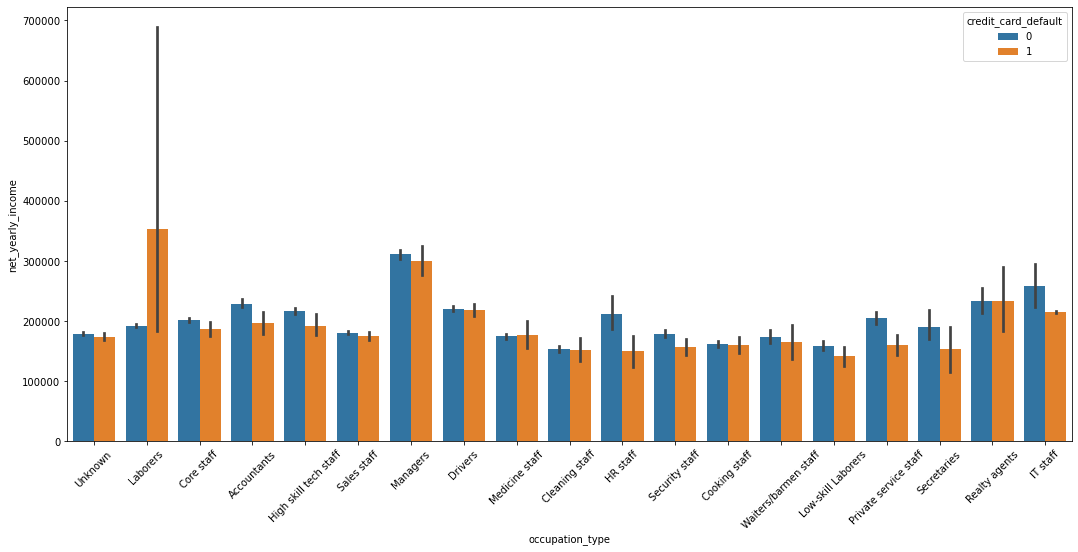

In [65]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=train_data['occupation_type'], y=train_data['net_yearly_income'], hue=train_data['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

imputations using other columns values should be done

Data imbalance should also be treated using SMOTE method

**Check data for imbalance**

In [13]:
train_data.credit_card_default.value_counts(normalize=True)*100

0    91.879722
1     8.120278
Name: credit_card_default, dtype: float64